In [106]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

In [107]:
df = pd.read_csv("../dados/plataforma.csv")

In [108]:
df.shape

(7, 28)

In [109]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
df

platform  water_depth  weight  installation_date  \
0         1           99   22000               1988   
1         2          112   30364               1983   
2        20          141   15561               1978   
3        25          156   27647               1980   
4        26          103   18584               1983   
5        27          144   17500               1983   
6        29          116   10054               1993   

   type_of_production (1 oil and gas; 2 oil; 3 gas)  number_of_legs  \
0                                                 1               8   
1                                                 1               8   
2                                                 2               8   
3                                                 2               8   
4                                                 3               8   
5                                                 3               8   
6                                                 1               4   

   number_of_piles  height_of_jacket_or_sub-structure  distance_to_coast  \
0                8                             114.00                187   
1                9                             123.00                207   
2               26                             147.00                120   
3               32                             166.00                240   
4               20                             122.50                230   
5               20                             154.00                130   
6                5                             136.00                282   

   risk_to_other_users-complete   risk_to_other_users-partial  \
0                              1                         0.00   
1                              1                         0.00   
2                              0                         0.00   
3                              0                         0.00   
4                              0                         0.00   
5                              0                         0.00   
6                              1                         0.00   

   risk_to_personnel-complete  risk_to_personnel-partial  \
0                        0.29                       0.12   
1                        0.32                       0.16   
2                        0.03                       0.01   
3                        0.04                       0.02   
4                        0.09                       0.06   
5                        0.14                       0.13   
6                        0.14                       0.08   

   energy_consumption-complete  energy_consumption-partial  \
0                      1110100                      817000   
1                      1180500                      895500   
2                       297654                      530148   
3                       487750                      570818   
4                       733082                      511765   
5                       520000                      568000   
6                       469823                      433179   

   emissions-complete  emissions-partial  impacts_of_option-complete  \
0               87000              58500                        0.43   
1               92000              64000                        0.51   
2               24277              31064                        0.66   
3               40416              45266                        0.53   
4               59588              41170                        0.53   
5               42000              44000                        0.53   
6               37162              32191                        0.53   

   impacts_of_option-partial  technical_feasibility_or_challenge-complete  \
0                          1                                         0.00   
1                          1                                         0.00   
2                          1                                         0.25   


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 28 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   platform                                          7 non-null      int64  
 1   water_depth                                       7 non-null      int64  
 2   weight                                            7 non-null      int64  
 3   installation_date                                 7 non-null      int64  
 4   type_of_production (1 oil and gas; 2 oil; 3 gas)  7 non-null      int64  
 5   number_of_legs                                    7 non-null      int64  
 6   number_of_piles                                   7 non-null      int64  
 7   height_of_jacket_or_sub-structure                 7 non-null      float64
 8   distance_to_coast                                 7 non-null      int64  
 9   risk_to_other_users-compl

In [111]:
df_2 = df.select_dtypes([int, float])
df_2.std()

platform                                               11.98
water_depth                                            22.31
weight                                               7027.97
installation_date                                       5.03
type_of_production (1 oil and gas; 2 oil; 3 gas)        0.90
number_of_legs                                          1.51
number_of_piles                                        10.11
height_of_jacket_or_sub-structure                      18.99
distance_to_coast                                      58.79
risk_to_other_users-complete                            0.53
risk_to_other_users-partial                             0.00
risk_to_personnel-complete                              0.12
risk_to_personnel-partial                               0.06
energy_consumption-complete                        339364.75
energy_consumption-partial                         170536.42
emissions-complete                                  26002.90
emissions-partial       

In [112]:
df_std_zero = df_2.loc[:, df_2.std() == 0]
df_std_zero.head()

impacts_of_option-partial  total_removal_cost-complete
0                          1                            1
1                          1                            1
2                          1                            1
3                          1                            1
4                          1                            1

#### Remoção de dados irrelevantes

In [113]:
df.shape

(7, 28)

In [114]:
colunas_para_dropar = ['total_removal_cost-complete', 'impacts_of_option-partial', 'removal_type', 'risk_to_other_users-partial']

In [115]:
df[colunas_para_dropar]

total_removal_cost-complete  impacts_of_option-partial removal_type  \
0                            1                          1    à avaliar   
1                            1                          1    à avaliar   
2                            1                          1    à avaliar   
3                            1                          1    à avaliar   
4                            1                          1    à avaliar   
5                            1                          1    à avaliar   
6                            1                          1    à avaliar   

   risk_to_other_users-partial  
0                         0.00  
1                         0.00  
2                         0.00  
3                         0.00  
4                         0.00  
5                         0.00  
6                         0.00

In [116]:
df.drop(colunas_para_dropar, axis=1, inplace=True)

In [117]:
df.shape

(7, 24)

#### Mapa de correlação das características das plataformas

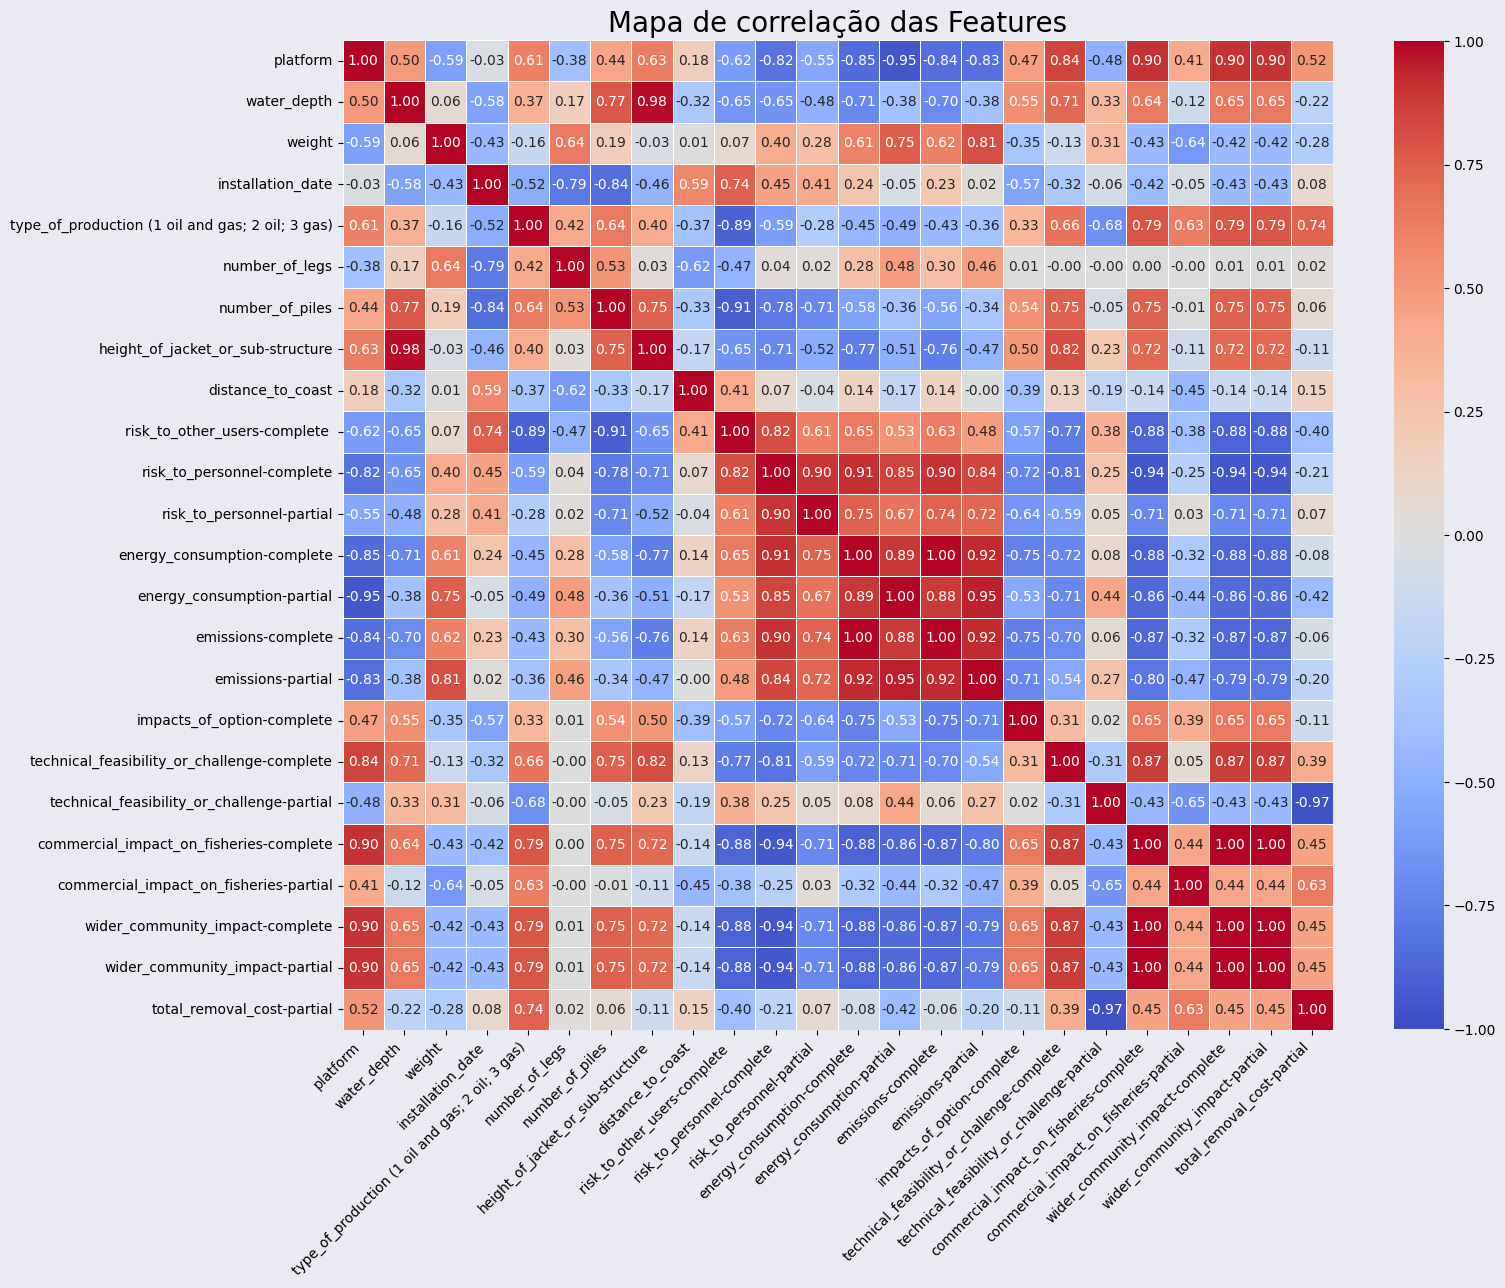

In [118]:
matriz_correlacao = df.corr()

plt.figure(figsize=(16, 16), facecolor='#eaeaf2')

ax = sns.heatmap(data=matriz_correlacao,
                xticklabels=df.columns,
                yticklabels=df.columns,
                annot=True, 
                cmap='coolwarm',
                center=0,
                vmin=-1,
                vmax=1,
                square=True,
                fmt='.2f',
                linewidths=0.7,
                cbar=True,
                cbar_kws={"shrink": 0.685} 

)   
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.title('Mapa de correlação das Features', fontsize=20)

plt.tight_layout()

plt.show()

In [119]:
df.groupby(['type_of_production (1 oil and gas; 2 oil; 3 gas)']).size()

type_of_production (1 oil and gas; 2 oil; 3 gas)
1    3
2    2
3    2
dtype: int64

### Padronizando os valores do DataFrame

In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
scaler = StandardScaler()
dados_padronizados = scaler.fit_transform(df)

In [122]:
dados_padronizados[0]

array([-1.58370557, -1.23125175,  0.26983446,  0.85839508, -1.02899151,
        0.40824829, -0.97712771, -1.33640499, -0.22833309,  1.15470054,
        1.31608537,  0.70658435,  1.35122258,  1.26003176,  1.34440775,
        1.16459084, -1.6245821 , -1.33334059,  0.6582085 , -1.52752523,
       -0.67203225, -1.52532126, -1.52532126, -0.67590886])

###

### Kmeans

In [123]:
# Ajuste do PCA
# X = df.values
pca = PCA(n_components=2)
X_pca = pca.fit_transform(dados_padronizados)

In [124]:
# Ajuste do KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_pca)
rotulos_kmeans = kmeans.labels_

/home/bruno/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [125]:
rotulos_kmeans

array([0, 0, 1, 1, 1, 1, 1], dtype=int32)

In [126]:
# Adicionando os clusters de cada plataforma como uma coluna no DataFrame
df['cluster'] = rotulos_kmeans

In [127]:
df

platform  water_depth  weight  installation_date  \
0         1           99   22000               1988   
1         2          112   30364               1983   
2        20          141   15561               1978   
3        25          156   27647               1980   
4        26          103   18584               1983   
5        27          144   17500               1983   
6        29          116   10054               1993   

   type_of_production (1 oil and gas; 2 oil; 3 gas)  number_of_legs  \
0                                                 1               8   
1                                                 1               8   
2                                                 2               8   
3                                                 2               8   
4                                                 3               8   
5                                                 3               8   
6                                                 1               4   

   number_of_piles  height_of_jacket_or_sub-structure  distance_to_coast  \
0                8                             114.00                187   
1                9                             123.00                207   
2               26                             147.00                120   
3               32                             166.00                240   
4               20                             122.50                230   
5               20                             154.00                130   
6                5                             136.00                282   

   risk_to_other_users-complete   risk_to_personnel-complete  \
0                              1                        0.29   
1                              1                        0.32   
2                              0                        0.03   
3                              0                        0.04   
4                              0                        0.09   
5                              0                        0.14   
6                              1                        0.14   

   risk_to_personnel-partial  energy_consumption-complete  \
0                       0.12                      1110100   
1                       0.16                      1180500   
2                       0.01                       297654   
3                       0.02                       487750   
4                       0.06                       733082   
5                       0.13                       520000   
6                       0.08                       469823   

   energy_consumption-partial  emissions-complete  emissions-partial  \
0                      817000               87000              58500   
1                      895500               92000              64000   
2                      530148               24277              31064   
3                      570818               40416              45266   
4                      511765               59588              41170   
5                      568000               42000              44000   
6                      433179               37162              32191   

   impacts_of_option-complete  technical_feasibility_or_challenge-complete  \
0                        0.43                                         0.00   
1                        0.51                                         0.00   
2                        0.66                                         0.25   
3                        0.53                                         0.64   
4                        0.53                                         0.39   
5                        0.53                                         0.45   
6                        0.53                                         0.29   

   technical_feasibility_or_challenge-partial  \
0                                        1.00   
1                                        1.00   
2                                

In [128]:
info_plataformas = ['platform', 'water_depth', 'type_of_production (1 oil and gas; 2 oil; 3 gas)', 'number_of_piles']

colors = ['red', 'blue']

grafico_kmeans = px.scatter(df, x=X_pca[:, 0], y=X_pca[:, 1], color='cluster', hover_data=info_plataformas, color_continuous_scale=colors)

grafico_kmeans.show()

### Criando novos registros

In [129]:
df.drop(['cluster'], axis=1, inplace=True)

In [130]:
df.head()

platform  water_depth  weight  installation_date  \
0         1           99   22000               1988   
1         2          112   30364               1983   
2        20          141   15561               1978   
3        25          156   27647               1980   
4        26          103   18584               1983   

   type_of_production (1 oil and gas; 2 oil; 3 gas)  number_of_legs  \
0                                                 1               8   
1                                                 1               8   
2                                                 2               8   
3                                                 2               8   
4                                                 3               8   

   number_of_piles  height_of_jacket_or_sub-structure  distance_to_coast  \
0                8                             114.00                187   
1                9                             123.00                207   
2               26                             147.00                120   
3               32                             166.00                240   
4               20                             122.50                230   

   risk_to_other_users-complete   risk_to_personnel-complete  \
0                              1                        0.29   
1                              1                        0.32   
2                              0                        0.03   
3                              0                        0.04   
4                              0                        0.09   

   risk_to_personnel-partial  energy_consumption-complete  \
0                       0.12                      1110100   
1                       0.16                      1180500   
2                       0.01                       297654   
3                       0.02                       487750   
4                       0.06                       733082   

   energy_consumption-partial  emissions-complete  emissions-partial  \
0                      817000               87000              58500   
1                      895500               92000              64000   
2                      530148               24277              31064   
3                      570818               40416              45266   
4                      511765               59588              41170   

   impacts_of_option-complete  technical_feasibility_or_challenge-complete  \
0                        0.43                                         0.00   
1                        0.51                                         0.00   
2                        0.66                                         0.25   
3                        0.53                                         0.64   
4                        0.53                                         0.39   

   technical_feasibility_or_challenge-partial  \
0                                        1.00   
1                                        1.00   
2                                        1.00   
3                                        1.00   
4                                        0.15   

   commercial_impact_on_fisheries-complete  \
0                                     0.79   
1                                     0.79   
2                                     1.00   
3                                     1.00   
4                                     1.00   

   commercial_impact_on_fisheries-partial  wider_community_impact-complete  \
0                                    0.78                             0.50   
1                                    0.78                             0.50   
2                                    0.94                             1.00   
3                                    0.66                             1.00   
4                                    0.99                             1.00   

   wider_community_impact-partial  total_removal_cost-partial  
0                            

In [131]:
df.shape

(7, 24)

In [242]:
import pandas as pd
import numpy as np

# Função para adicionar ruído a um registro
def gerar_ruido_registro(registro, amplitude_ruido_int=5, amplitude_ruido_float=0.2):
    registro_com_ruido = registro.copy() # Copiando o registro alvo
    for coluna, valor in registro_com_ruido.items(): # Percorrendo os valores do registro
        if int(valor) == valor: # Verificando se é inteiro (está sendo tratado desta forma por conta do iloc que retorna valores como 1.00)
            ruido_int = np.random.randint(-amplitude_ruido_int, amplitude_ruido_int + 1)

            if valor + ruido_int < 0:
                ruido_int = -valor  # Garante que o ruído resultante não faça o valor ser negativo
            
            registro_com_ruido[coluna] += ruido_int
        else:
            ruido_float = np.random.normal(scale=amplitude_ruido_float)

            if valor + ruido_float < 0:
                ruido_int = -valor  # Garante que o ruído resultante não faça o valor ser negativo

            registro_com_ruido[coluna] += ruido_float
    return registro_com_ruido

In [320]:
# Exemplo de um registro
registro = {'coluna_inteira': 10, 'coluna_float': 3.14}

# Adiciona ruído ao registro
registro_com_ruido = gerar_ruido_registro(registro)

# Exibindo o registro com ruído
print("Registro original:", registro)
print("Registro com ruído:", registro_com_ruido)

Registro original: {'coluna_inteira': 10, 'coluna_float': 3.14}
Registro com ruído: {'coluna_inteira': 11, 'coluna_float': 2.931860029989924}


In [348]:
registro_plataform = gerar_ruido_registro(df.iloc[0])
registro_plataform

platform                                                 0.00
water_depth                                             97.00
weight                                               21997.00
installation_date                                     1990.00
type_of_production (1 oil and gas; 2 oil; 3 gas)         1.00
number_of_legs                                           9.00
number_of_piles                                          4.00
height_of_jacket_or_sub-structure                      117.00
distance_to_coast                                      186.00
risk_to_other_users-complete                             0.00
risk_to_personnel-complete                               0.35
risk_to_personnel-partial                                0.15
energy_consumption-complete                        1110098.00
energy_consumption-partial                          816997.00
emissions-complete                                   86996.00
emissions-partial                                    58502.00
impacts_

In [134]:
df.loc[0]

platform                                                 1.00
water_depth                                             99.00
weight                                               22000.00
installation_date                                     1988.00
type_of_production (1 oil and gas; 2 oil; 3 gas)         1.00
number_of_legs                                           8.00
number_of_piles                                          8.00
height_of_jacket_or_sub-structure                      114.00
distance_to_coast                                      187.00
risk_to_other_users-complete                             1.00
risk_to_personnel-complete                               0.29
risk_to_personnel-partial                                0.12
energy_consumption-complete                        1110100.00
energy_consumption-partial                          817000.00
emissions-complete                                   87000.00
emissions-partial                                    58500.00
impacts_

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 24 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   platform                                          7 non-null      int64  
 1   water_depth                                       7 non-null      int64  
 2   weight                                            7 non-null      int64  
 3   installation_date                                 7 non-null      int64  
 4   type_of_production (1 oil and gas; 2 oil; 3 gas)  7 non-null      int64  
 5   number_of_legs                                    7 non-null      int64  
 6   number_of_piles                                   7 non-null      int64  
 7   height_of_jacket_or_sub-structure                 7 non-null      float64
 8   distance_to_coast                                 7 non-null      int64  
 9   risk_to_other_users-compl